In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RANSACRegressor

from sklearn.preprocessing import PolynomialFeatures

In [3]:
columns = ["crime_rate", "zoned_land", "industry", "bounds_river", "nox_conc", "rooms", "age", "distance", "highways", "tax", "pt_ratio", "b_estimator", "pop_status", "price"]
housing_data = pd.read_csv("data/housing.data", delim_whitespace = True, names = columns, header = None)

In [4]:
housing_data

,crime_rate,zoned_land,industry,bounds_river,nox_conc,rooms,age,distance,highways,tax,pt_ratio,b_estimator,pop_status,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [5]:
housing_model = LinearRegression()
predictor_attributes = housing_data.drop("price", axis = 1)
housing_model.fit(predictor_attributes, housing_data.price)
print(housing_model.coef_)
print(housing_model.intercept_)

[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
36.45948838509025


In [6]:
testing_houses = housing_data.sample(10)
predicted = housing_model.predict(testing_houses.drop("price", axis = 1))
print(predicted)
print(testing_houses.price)

[ 9.58376737 25.70817905 18.03655088 29.08105546 13.36660811 32.3995325
 20.77323638 30.76109485 18.58215236 25.48120057]
415     7.2
269    20.7
47     16.6
93     25.0
416     7.5
227    31.6
112    18.8
190    37.0
452    16.1
314    23.8
Name: price, dtype: float64


In [7]:
ransac = RANSACRegressor()
ransac.fit(housing_data.drop("price",axis = 1), housing_data.price)
print(ransac.estimator_.coef_, ransac.estimator_.intercept_)

[ 9.28479852e-02 -6.56942095e-02 -1.64029598e-01  3.18338213e-01
 -7.23872756e+00  1.00613297e+01 -6.21860012e-02 -7.52988086e-01
  1.57906587e-01 -8.31223835e-03 -8.41125504e-01  4.42208644e-02
  2.75642884e-01] -30.681102143141032


In [8]:
# We can also provide parameters, e.g., min number ofrandom samples, max iterations, threshold (to includedata points)
ransac_regressor = RANSACRegressor(LinearRegression(), min_samples = 50, max_trials = 100, residual_threshold = 5.0)
ransac_regressor.fit(housing_data.drop("price", axis = 1), housing_data.price)

RANSACRegressor(estimator=LinearRegression(), min_samples=50,
                residual_threshold=5.0)

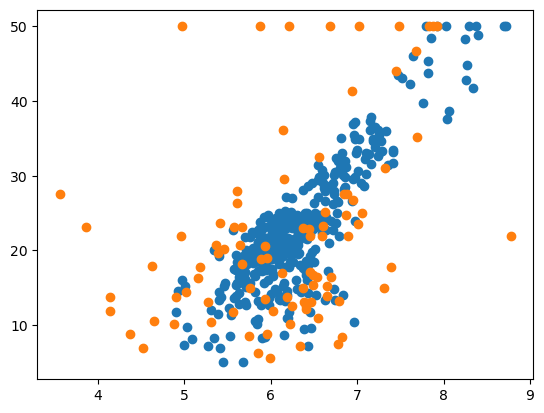

In [9]:
inliers = housing_data[ransac_regressor.inlier_mask_]
outliers = housing_data[~ransac_regressor.inlier_mask_]
plt.scatter(inliers.rooms, inliers.price)
plt.scatter(outliers.rooms, outliers.price)

In [10]:
# Polynomial Regression - ▪ Extension of the linear regression algorithm
x = np.arange(6).reshape(3, 2)
poly = PolynomialFeatures(2)
x_transformed = poly.fit_transform(x)
print(x_transformed)
print(poly.get_feature_names_out)
print(poly.n_features_in_)
print(poly.n_output_features_)
# Now we can perform linear regression with x_transformed as the input

[[ 1.  0.  1.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]
<bound method PolynomialFeatures.get_feature_names_out of PolynomialFeatures()>
2
6


In [11]:
# Logistic Regression - Use a regression model to classify
columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
iris_data = pd.read_csv("data/iris/iris.data", names = columns)
iris_test = iris_data.sample(10).drop("class", axis = 1)
iris_train_data = iris_data.drop("class", axis = 1)
iris_train_labels = iris_data["class"]
model = LogisticRegression(C = 10e9)
model.fit(iris_train_data, iris_train_labels)
print(model.predict(iris_test))
print(model.predict_proba(iris_test))

['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica']
[[1.51697764e-26 9.99962584e-01 3.74160035e-05]
 [1.00000000e+00 2.07669474e-33 6.40719945e-60]
 [3.33004797e-64 7.54087162e-08 9.99999925e-01]
 [3.61077192e-26 9.99999985e-01 1.47919430e-08]
 [1.00000000e+00 1.82216665e-18 9.04765698e-41]
 [1.01555914e-56 1.36270264e-07 9.99999864e-01]
 [1.00000000e+00 1.08551040e-25 2.12791818e-50]
 [9.25797192e-36 9.99744952e-01 2.55048245e-04]
 [1.00000000e+00 1.59660900e-29 3.86930675e-55]
 [1.92188662e-47 1.00547662e-03 9.98994523e-01]]
